<a href="https://colab.research.google.com/github/535220088/Program/blob/main/Programku.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

import pickle
import time

In [ ]:
jkt = pd.read_excel('/content/drive/MyDrive/FIX BGT DATA SKRIPSI/Stasiun Kemayoran.xlsx')
bgr = pd.read_excel('/content/drive/MyDrive/FIX BGT DATA SKRIPSI/Stasiun Citeko.xlsx')
tma = pd.read_excel('/content/drive/MyDrive/FIX BGT DATA SKRIPSI/TMA Banjir.xlsx')

# Prapemrosesan Dataset "JKT"

In [ ]:
jkt = jkt.iloc[5:].reset_index(drop=True)
jkt.columns = jkt.iloc[1]
jkt = jkt[2:].reset_index(drop=True)

numeric_cols = ['TN', 'TX', 'TAVG', 'RH_AVG', 'RR']
for col in numeric_cols:
    jkt[col] = pd.to_numeric(jkt[col], errors='coerce')

jkt['TANGGAL'] = pd.to_datetime(jkt['TANGGAL'], format='%d-%m-%Y', errors='coerce')
jkt = jkt.sort_values('TANGGAL').reset_index(drop=True)


In [ ]:
jkt = jkt.dropna(subset=['TANGGAL'])
jkt

1,TANGGAL,TN,TX,TAVG,RH_AVG,RR
0,2024-01-01,26.4,32.2,29.6,77.0,1.8
1,2024-01-02,27.2,31.8,29.7,78.0,0.0
2,2024-01-03,26.6,30.2,28.0,84.0,2.5
3,2024-01-04,26.4,31.4,27.1,87.0,8.5
4,2024-01-05,25.0,32.4,28.1,80.0,30.8
...,...,...,...,...,...,...
451,2025-03-27,26.8,32.6,28.2,84.0,0.0
452,2025-03-28,25.0,30.8,28.2,82.0,5.4
453,2025-03-29,25.6,33.0,28.8,74.0,0.3
454,2025-03-30,25.6,34.6,30.2,74.0,8888.0


In [ ]:
jkt = jkt.drop_duplicates(subset=['TANGGAL'])
jkt

1,TANGGAL,TN,TX,TAVG,RH_AVG,RR
0,2024-01-01,26.4,32.2,29.6,77.0,1.8
1,2024-01-02,27.2,31.8,29.7,78.0,0.0
2,2024-01-03,26.6,30.2,28.0,84.0,2.5
3,2024-01-04,26.4,31.4,27.1,87.0,8.5
4,2024-01-05,25.0,32.4,28.1,80.0,30.8
...,...,...,...,...,...,...
451,2025-03-27,26.8,32.6,28.2,84.0,0.0
452,2025-03-28,25.0,30.8,28.2,82.0,5.4
453,2025-03-29,25.6,33.0,28.8,74.0,0.3
454,2025-03-30,25.6,34.6,30.2,74.0,8888.0


In [ ]:
jkt.replace(8888, np.nan, inplace=True)
jkt

1,TANGGAL,TN,TX,TAVG,RH_AVG,RR
0,2024-01-01,26.4,32.2,29.6,77.0,1.8
1,2024-01-02,27.2,31.8,29.7,78.0,0.0
2,2024-01-03,26.6,30.2,28.0,84.0,2.5
3,2024-01-04,26.4,31.4,27.1,87.0,8.5
4,2024-01-05,25.0,32.4,28.1,80.0,30.8
...,...,...,...,...,...,...
451,2025-03-27,26.8,32.6,28.2,84.0,0.0
452,2025-03-28,25.0,30.8,28.2,82.0,5.4
453,2025-03-29,25.6,33.0,28.8,74.0,0.3
454,2025-03-30,25.6,34.6,30.2,74.0,NaN


In [ ]:
jkt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 456 entries, 0 to 455
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   TANGGAL  456 non-null    datetime64[ns]
 1   TN       444 non-null    float64       
 2   TX       453 non-null    float64       
 3   TAVG     453 non-null    float64       
 4   RH_AVG   455 non-null    float64       
 5   RR       373 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 24.9 KB


In [ ]:
jkt.isnull().sum()

,0
1,
TANGGAL,0
TN,12
TX,3
TAVG,3
RH_AVG,1
RR,83


In [ ]:
for col in ['TN', 'TX', 'TAVG', 'RH_AVG', 'RR']:
    jkt[col] = jkt[col].interpolate()

jkt

1,TANGGAL,TN,TX,TAVG,RH_AVG,RR
0,2024-01-01,26.4,32.2,29.6,77.0,1.80
1,2024-01-02,27.2,31.8,29.7,78.0,0.00
2,2024-01-03,26.6,30.2,28.0,84.0,2.50
3,2024-01-04,26.4,31.4,27.1,87.0,8.50
4,2024-01-05,25.0,32.4,28.1,80.0,30.80
...,...,...,...,...,...,...
451,2025-03-27,26.8,32.6,28.2,84.0,0.00
452,2025-03-28,25.0,30.8,28.2,82.0,5.40
453,2025-03-29,25.6,33.0,28.8,74.0,0.30
454,2025-03-30,25.6,34.6,30.2,74.0,0.15


In [ ]:
jkt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 456 entries, 0 to 455
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   TANGGAL  456 non-null    datetime64[ns]
 1   TN       456 non-null    float64       
 2   TX       456 non-null    float64       
 3   TAVG     456 non-null    float64       
 4   RH_AVG   456 non-null    float64       
 5   RR       456 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 24.9 KB


# Prapemrosesan Dataset "BGR"

In [ ]:
bgr = bgr.iloc[5:].reset_index(drop=True)
bgr.columns = bgr.iloc[1]
bgr = bgr[2:].reset_index(drop=True)

numeric_cols = ['TN', 'TX', 'TAVG', 'RH_AVG', 'RR']
for col in numeric_cols:
    bgr[col] = pd.to_numeric(bgr[col], errors='coerce')

bgr['TANGGAL'] = pd.to_datetime(bgr['TANGGAL'], format='%d-%m-%Y', errors='coerce')
bgr = bgr.sort_values('TANGGAL').reset_index(drop=True)

bgr

1,TANGGAL,TN,TX,TAVG,RH_AVG,RR
0,2024-01-01,19.6,25.8,22.2,92.0,23.5
1,2024-01-02,20.0,27.3,23.0,91.0,27.2
2,2024-01-03,20.0,27.4,21.9,91.0,18.4
3,2024-01-04,19.6,25.5,20.9,93.0,0.0
4,2024-01-05,18.8,24.6,21.7,89.0,64.0
...,...,...,...,...,...,...
462,NaT,NaN,NaN,NaN,NaN,NaN
463,NaT,NaN,NaN,NaN,NaN,NaN
464,NaT,NaN,NaN,NaN,NaN,NaN
465,NaT,NaN,NaN,NaN,NaN,NaN


In [ ]:
bgr = bgr.dropna(subset=['TANGGAL'])
bgr

1,TANGGAL,TN,TX,TAVG,RH_AVG,RR
0,2024-01-01,19.6,25.8,22.2,92.0,23.5
1,2024-01-02,20.0,27.3,23.0,91.0,27.2
2,2024-01-03,20.0,27.4,21.9,91.0,18.4
3,2024-01-04,19.6,25.5,20.9,93.0,0.0
4,2024-01-05,18.8,24.6,21.7,89.0,64.0
...,...,...,...,...,...,...
451,2025-03-27,19.6,26.0,22.0,87.0,8.7
452,2025-03-28,20.2,24.0,21.7,91.0,6.2
453,2025-03-29,19.2,27.2,22.3,81.0,5.0
454,2025-03-30,19.6,28.4,23.0,79.0,8888.0


In [ ]:
bgr = bgr.drop_duplicates(subset=['TANGGAL'])
bgr

1,TANGGAL,TN,TX,TAVG,RH_AVG,RR
0,2024-01-01,19.6,25.8,22.2,92.0,23.5
1,2024-01-02,20.0,27.3,23.0,91.0,27.2
2,2024-01-03,20.0,27.4,21.9,91.0,18.4
3,2024-01-04,19.6,25.5,20.9,93.0,0.0
4,2024-01-05,18.8,24.6,21.7,89.0,64.0
...,...,...,...,...,...,...
451,2025-03-27,19.6,26.0,22.0,87.0,8.7
452,2025-03-28,20.2,24.0,21.7,91.0,6.2
453,2025-03-29,19.2,27.2,22.3,81.0,5.0
454,2025-03-30,19.6,28.4,23.0,79.0,8888.0


In [ ]:
bgr.replace(8888, np.nan, inplace=True)
bgr

1,TANGGAL,TN,TX,TAVG,RH_AVG,RR
0,2024-01-01,19.6,25.8,22.2,92.0,23.5
1,2024-01-02,20.0,27.3,23.0,91.0,27.2
2,2024-01-03,20.0,27.4,21.9,91.0,18.4
3,2024-01-04,19.6,25.5,20.9,93.0,0.0
4,2024-01-05,18.8,24.6,21.7,89.0,64.0
...,...,...,...,...,...,...
451,2025-03-27,19.6,26.0,22.0,87.0,8.7
452,2025-03-28,20.2,24.0,21.7,91.0,6.2
453,2025-03-29,19.2,27.2,22.3,81.0,5.0
454,2025-03-30,19.6,28.4,23.0,79.0,NaN


In [ ]:
bgr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 456 entries, 0 to 455
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   TANGGAL  456 non-null    datetime64[ns]
 1   TN       454 non-null    float64       
 2   TX       455 non-null    float64       
 3   TAVG     454 non-null    float64       
 4   RH_AVG   455 non-null    float64       
 5   RR       415 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 24.9 KB


In [ ]:
bgr.isnull().sum()

,0
1,
TANGGAL,0
TN,2
TX,1
TAVG,2
RH_AVG,1
RR,41


In [ ]:
for col in ['TN', 'TX', 'TAVG', 'RH_AVG', 'RR']:
    bgr[col] = bgr[col].interpolate()

bgr

1,TANGGAL,TN,TX,TAVG,RH_AVG,RR
0,2024-01-01,19.6,25.8,22.2,92.0,23.5
1,2024-01-02,20.0,27.3,23.0,91.0,27.2
2,2024-01-03,20.0,27.4,21.9,91.0,18.4
3,2024-01-04,19.6,25.5,20.9,93.0,0.0
4,2024-01-05,18.8,24.6,21.7,89.0,64.0
...,...,...,...,...,...,...
451,2025-03-27,19.6,26.0,22.0,87.0,8.7
452,2025-03-28,20.2,24.0,21.7,91.0,6.2
453,2025-03-29,19.2,27.2,22.3,81.0,5.0
454,2025-03-30,19.6,28.4,23.0,79.0,2.5


In [ ]:
bgr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 456 entries, 0 to 455
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   TANGGAL  456 non-null    datetime64[ns]
 1   TN       456 non-null    float64       
 2   TX       456 non-null    float64       
 3   TAVG     456 non-null    float64       
 4   RH_AVG   456 non-null    float64       
 5   RR       456 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 24.9 KB


#Integrasi Dataset

In [ ]:
#Gabungkan jkt dengan bgr
gabung = pd.merge(jkt, bgr, on='TANGGAL', suffixes=('_JKT', '_BGR'), how='outer')
gabung

1,TANGGAL,TN_JKT,TX_JKT,TAVG_JKT,RH_AVG_JKT,RR_JKT,TN_BGR,TX_BGR,TAVG_BGR,RH_AVG_BGR,RR_BGR
0,2024-01-01,26.4,32.2,29.6,77.0,1.80,19.6,25.8,22.2,92.0,23.5
1,2024-01-02,27.2,31.8,29.7,78.0,0.00,20.0,27.3,23.0,91.0,27.2
2,2024-01-03,26.6,30.2,28.0,84.0,2.50,20.0,27.4,21.9,91.0,18.4
3,2024-01-04,26.4,31.4,27.1,87.0,8.50,19.6,25.5,20.9,93.0,0.0
4,2024-01-05,25.0,32.4,28.1,80.0,30.80,18.8,24.6,21.7,89.0,64.0
...,...,...,...,...,...,...,...,...,...,...,...
451,2025-03-27,26.8,32.6,28.2,84.0,0.00,19.6,26.0,22.0,87.0,8.7
452,2025-03-28,25.0,30.8,28.2,82.0,5.40,20.2,24.0,21.7,91.0,6.2
453,2025-03-29,25.6,33.0,28.8,74.0,0.30,19.2,27.2,22.3,81.0,5.0
454,2025-03-30,25.6,34.6,30.2,74.0,0.15,19.6,28.4,23.0,79.0,2.5


In [ ]:
tma

,Tanggal,Bendung Katulampa,Pos Depok,Manggarai BKB,PA. Karet,Banjir
0,01-01-2024,40,95,620,260,1
1,02-01-2024,20,95,620,270,0
2,03-01-2024,20,100,645,300,0
3,04-01-2024,50,150,650,390,1
4,05-01-2024,20,105,710,390,1
...,...,...,...,...,...,...
451,27-03-2025,20,95,660,310,0
452,28-03-2025,20,95,660,280,0
453,29-03-2025,20,95,650,250,0
454,30-03-2025,20,90,650,250,0


In [ ]:
tma['Tanggal'] = pd.to_datetime(tma['Tanggal'], format='%d-%m-%Y', errors='coerce')

#Gabungkan hasilnya dengan jkt
df = pd.merge(gabung, tma, left_on='TANGGAL', right_on='Tanggal', how='inner')
df.drop(columns=['Tanggal'], inplace=True)

# Cek hasil akhir
print(df.head())

     TANGGAL  TN_JKT  TX_JKT  TAVG_JKT  RH_AVG_JKT  RR_JKT  TN_BGR  TX_BGR  \
0 2024-01-01    26.4    32.2      29.6        77.0     1.8    19.6    25.8   
1 2024-01-02    27.2    31.8      29.7        78.0     0.0    20.0    27.3   
2 2024-01-03    26.6    30.2      28.0        84.0     2.5    20.0    27.4   
3 2024-01-04    26.4    31.4      27.1        87.0     8.5    19.6    25.5   
4 2024-01-05    25.0    32.4      28.1        80.0    30.8    18.8    24.6   

   TAVG_BGR  RH_AVG_BGR  RR_BGR  Bendung Katulampa  Pos Depok  Manggarai BKB  \
0      22.2        92.0    23.5                 40         95            620   
1      23.0        91.0    27.2                 20         95            620   
2      21.9        91.0    18.4                 20        100            645   
3      20.9        93.0     0.0                 50        150            650   
4      21.7        89.0    64.0                 20        105            710   

   PA. Karet  Banjir  
0        260       1  
1   

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   TANGGAL            456 non-null    datetime64[ns]
 1   TN_JKT             456 non-null    float64       
 2   TX_JKT             456 non-null    float64       
 3   TAVG_JKT           456 non-null    float64       
 4   RH_AVG_JKT         456 non-null    float64       
 5   RR_JKT             456 non-null    float64       
 6   TN_BGR             456 non-null    float64       
 7   TX_BGR             456 non-null    float64       
 8   TAVG_BGR           456 non-null    float64       
 9   RH_AVG_BGR         456 non-null    float64       
 10  RR_BGR             456 non-null    float64       
 11  Bendung Katulampa  456 non-null    int64         
 12  Pos Depok          456 non-null    int64         
 13  Manggarai BKB      456 non-null    int64         
 14  PA. Karet 

In [ ]:
X = df.drop(columns=['TANGGAL', 'Banjir'])
y = df['Banjir']

# Data Split 70/30

In [ ]:
split_name_70 = "70/30 (Latih/Uji)"
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

print(f"Data 70/30 siap. Latih: {X_train_70.shape}, Uji: {X_test_70.shape}")

Data 70/30 siap. Latih: (319, 14), Uji: (137, 14)


## Data Split 80/20

In [ ]:
split_name_80 = "80/20 (Latih/Uji)"
X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

print(f"Data 80/20 siap. Latih: {X_train_80.shape}, Uji: {X_test_80.shape}")

Data 80/20 siap. Latih: (364, 14), Uji: (92, 14)


In [ ]:
results = []
best_trackers = {
    "RF": {'accuracy': 0.0, 'model': None, 'name': None, 'params': None},
    "XGB": {'accuracy': 0.0, 'model': None, 'name': None, 'params': None}
}

#Algoritma XGBoost

## XGBoost Default (70/30)


--- Menjalankan: XGBoost Default (70/30) ---


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:52:17] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  Selesai dalam 0.37 dtk. Akurasi: 0.7737
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       105
           1       0.52      0.38      0.44        32

    accuracy                           0.77       137
   macro avg       0.67      0.64      0.65       137
weighted avg       0.75      0.77      0.76       137



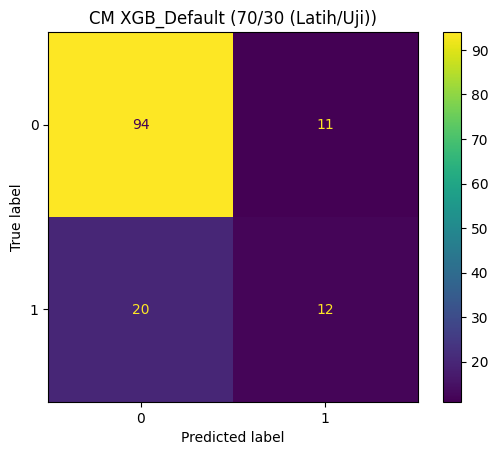

  🏆 Akurasi XGB baru terbaik! (0.7737)


In [ ]:
# --- [70/30] XGBoost Default ---
print("\n--- Menjalankan: XGBoost Default (70/30) ---")
model_name = 'XGB_Default'
split_name = split_name_70

best_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
best_params = {'parameters': 'default'}

start_time = time.time()
best_model.fit(X_train_70, y_train_70)

y_pred_xgb_default_70 = best_model.predict(X_test_70)
acc = accuracy_score(y_test_70, y_pred_xgb_default_70)
end_time = time.time()

print(f"  Selesai dalam {end_time - start_time:.2f} dtk. Akurasi: {acc:.4f}")

print(classification_report(y_test_70, y_pred_xgb_default_70))
cm = confusion_matrix(y_test_70, y_pred_xgb_default_70)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot()
plt.title(f"CM {model_name} ({split_name})")
plt.show()

results.append({'split_scenario': split_name, 'model_tuner': model_name, 'accuracy': acc, 'best_params': best_params})
if acc > best_trackers['XGB']['accuracy']:
    print(f"  🏆 Akurasi XGB baru terbaik! ({acc:.4f})")
    best_trackers['XGB'].update({'accuracy': acc, 'model': best_model, 'name': f"{model_name} ({split_name})", 'params': best_params})

## XGBoost GridSearchCV (70/30)


--- Menjalankan: XGBoost GridSearch (70/30) ---
  Selesai dalam 24.68 dtk. Akurasi: 0.8248
  Parameter Terbaik: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.6}
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       105
           1       0.72      0.41      0.52        32

    accuracy                           0.82       137
   macro avg       0.78      0.68      0.71       137
weighted avg       0.81      0.82      0.81       137



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:52:43] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


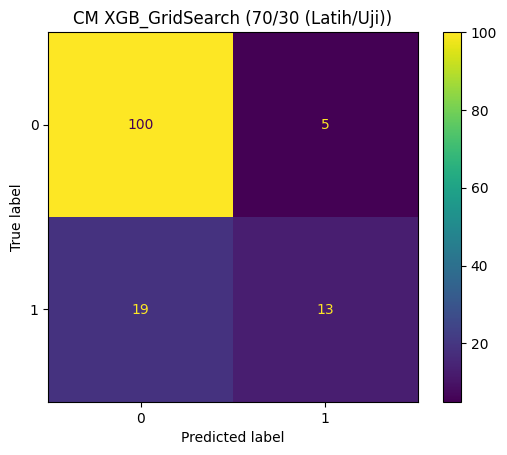

  🏆 Akurasi XGB baru terbaik! (0.8248)


In [ ]:
# --- [70/30] XGBoost GridSearch ---
print("\n--- Menjalankan: XGBoost GridSearch (70/30) ---")
model_name = 'XGB_GridSearch'
split_name = split_name_70

param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0]
}

base_xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
tuner = GridSearchCV(base_xgb, param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1, verbose=0)

start_time = time.time()
tuner.fit(X_train_70, y_train_70)

best_model = tuner.best_estimator_
best_params = tuner.best_params_
y_pred_xgb_grid_70 = best_model.predict(X_test_70)
acc = accuracy_score(y_test_70, y_pred_xgb_grid_70)
end_time = time.time()

print(f"  Selesai dalam {end_time - start_time:.2f} dtk. Akurasi: {acc:.4f}")
print(f"  Parameter Terbaik: {best_params}")

print(classification_report(y_test_70, y_pred_xgb_grid_70))
cm = confusion_matrix(y_test_70, y_pred_xgb_grid_70)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot()
plt.title(f"CM {model_name} ({split_name})")
plt.show()

results.append({'split_scenario': split_name, 'model_tuner': model_name, 'accuracy': acc, 'best_params': best_params})
if acc > best_trackers['XGB']['accuracy']:
    print(f"  🏆 Akurasi XGB baru terbaik! ({acc:.4f})")
    best_trackers['XGB'].update({'accuracy': acc, 'model': best_model, 'name': f"{model_name} ({split_name})", 'params': best_params})

## XGBoost RandomSearchCV (70/30)


--- Menjalankan: XGBoost RandomSearch (70/30) ---
  Selesai dalam 10.38 dtk. Akurasi: 0.7737
  Parameter Terbaik: {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.15, 'gamma': 0, 'colsample_bytree': 0.6}
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       105
           1       0.52      0.38      0.44        32

    accuracy                           0.77       137
   macro avg       0.67      0.64      0.65       137
weighted avg       0.75      0.77      0.76       137



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:52:53] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


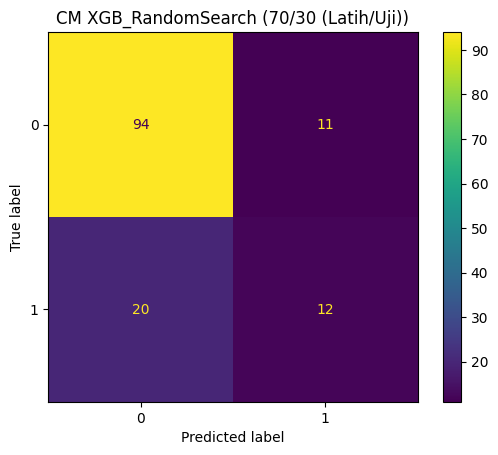

In [ ]:
# --- [70/30] XGBoost RandomSearch ---
print("\n--- Menjalankan: XGBoost RandomSearch (70/30) ---")
model_name = 'XGB_RandomSearch'
split_name = split_name_70

param_dist_xgb = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6, 7, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.5, 1]
}

base_xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
tuner = RandomizedSearchCV(base_xgb, param_dist_xgb, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, verbose=0, random_state=42)

start_time = time.time()
tuner.fit(X_train_70, y_train_70)

best_model = tuner.best_estimator_
best_params = tuner.best_params_
y_pred_xgb_random_70 = best_model.predict(X_test_70)
acc = accuracy_score(y_test_70, y_pred_xgb_random_70)
end_time = time.time()

print(f"  Selesai dalam {end_time - start_time:.2f} dtk. Akurasi: {acc:.4f}")
print(f"  Parameter Terbaik: {best_params}")

print(classification_report(y_test_70, y_pred_xgb_random_70))
cm = confusion_matrix(y_test_70, y_pred_xgb_random_70)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot()
plt.title(f"CM {model_name} ({split_name})")
plt.show()

results.append({'split_scenario': split_name, 'model_tuner': model_name, 'accuracy': acc, 'best_params': best_params})
if acc > best_trackers['XGB']['accuracy']:
    print(f"  🏆 Akurasi XGB baru terbaik! ({acc:.4f})")
    best_trackers['XGB'].update({'accuracy': acc, 'model': best_model, 'name': f"{model_name} ({split_name})", 'params': best_params})

## XGBoost Default (80/20)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:52:53] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



--- Menjalankan: XGBoost Default (80/20) ---
  Selesai dalam 0.04 dtk. Akurasi: 0.7826
              precision    recall  f1-score   support

           0       0.81      0.93      0.87        70
           1       0.58      0.32      0.41        22

    accuracy                           0.78        92
   macro avg       0.70      0.62      0.64        92
weighted avg       0.76      0.78      0.76        92



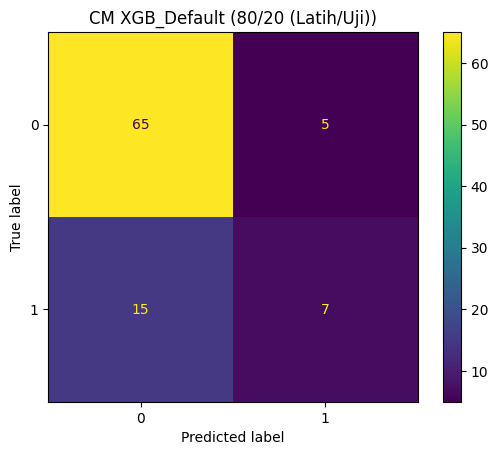

In [ ]:
# --- [80/20] XGBoost Default ---
print("\n--- Menjalankan: XGBoost Default (80/20) ---")
model_name = 'XGB_Default'
split_name = split_name_80

best_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
best_params = {'parameters': 'default'}

start_time = time.time()
best_model.fit(X_train_80, y_train_80)

y_pred_xgb_default_80 = best_model.predict(X_test_80)
acc = accuracy_score(y_test_80, y_pred_xgb_default_80)
end_time = time.time()

print(f"  Selesai dalam {end_time - start_time:.2f} dtk. Akurasi: {acc:.4f}")

print(classification_report(y_test_80, y_pred_xgb_default_80))
cm = confusion_matrix(y_test_80, y_pred_xgb_default_80)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot()
plt.title(f"CM {model_name} ({split_name})")
plt.show()

results.append({'split_scenario': split_name, 'model_tuner': model_name, 'accuracy': acc, 'best_params': best_params})
if acc > best_trackers['XGB']['accuracy']:
    print(f"  🏆 Akurasi XGB baru terbaik! ({acc:.4f})")
    best_trackers['XGB'].update({'accuracy': acc, 'model': best_model, 'name': f"{model_name} ({split_name})", 'params': best_params})

## XGBoost GridSearchCV (80/20)


--- Menjalankan: XGBoost GridSearch (80/20) ---
  Selesai dalam 13.08 dtk. Akurasi: 0.8261
  Parameter Terbaik: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
              precision    recall  f1-score   support

           0       0.83      0.97      0.89        70
           1       0.80      0.36      0.50        22

    accuracy                           0.83        92
   macro avg       0.81      0.67      0.70        92
weighted avg       0.82      0.83      0.80        92



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:53:06] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


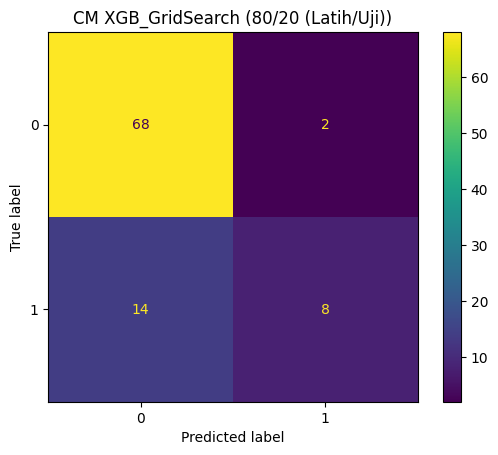

  🏆 Akurasi XGB baru terbaik! (0.8261)


In [ ]:
# --- [80/20] XGBoost GridSearch ---
print("\n--- Menjalankan: XGBoost GridSearch (80/20) ---")
model_name = 'XGB_GridSearch'
split_name = split_name_80

param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0]
}

base_xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
tuner = GridSearchCV(base_xgb, param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1, verbose=0)

start_time = time.time()
tuner.fit(X_train_80, y_train_80)

best_model = tuner.best_estimator_
best_params = tuner.best_params_
y_pred_xgb_grid_80 = best_model.predict(X_test_80)
acc = accuracy_score(y_test_80, y_pred_xgb_grid_80)
end_time = time.time()

print(f"  Selesai dalam {end_time - start_time:.2f} dtk. Akurasi: {acc:.4f}")
print(f"  Parameter Terbaik: {best_params}")

print(classification_report(y_test_80, y_pred_xgb_grid_80))
cm = confusion_matrix(y_test_80, y_pred_xgb_grid_80)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot()
plt.title(f"CM {model_name} ({split_name})")
plt.show()

results.append({'split_scenario': split_name, 'model_tuner': model_name, 'accuracy': acc, 'best_params': best_params})
if acc > best_trackers['XGB']['accuracy']:
    print(f"  🏆 Akurasi XGB baru terbaik! ({acc:.4f})")
    best_trackers['XGB'].update({'accuracy': acc, 'model': best_model, 'name': f"{model_name} ({split_name})", 'params': best_params})

## XGBoost RandomSearchCV (80/20)


--- Menjalankan: XGBoost RandomSearch (80/20) ---
  Selesai dalam 10.52 dtk. Akurasi: 0.7826
  Parameter Terbaik: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.2, 'gamma': 1, 'colsample_bytree': 0.7}
              precision    recall  f1-score   support

           0       0.82      0.91      0.86        70
           1       0.57      0.36      0.44        22

    accuracy                           0.78        92
   macro avg       0.70      0.64      0.65        92
weighted avg       0.76      0.78      0.76        92



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:53:17] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


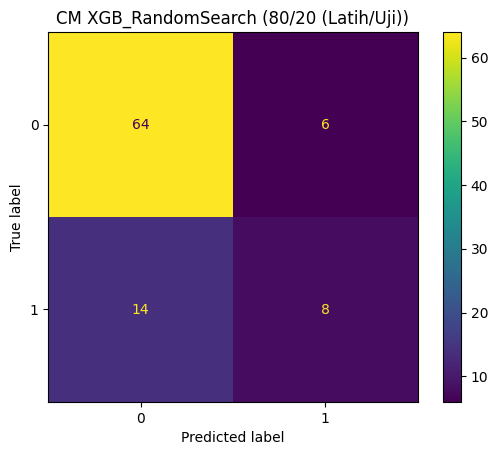

In [ ]:
# --- [80/20] XGBoost RandomSearch ---
print("\n--- Menjalankan: XGBoost RandomSearch (80/20) ---")
model_name = 'XGB_RandomSearch'
split_name = split_name_80

param_dist_xgb = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6, 7, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.5, 1]
}

base_xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
tuner = RandomizedSearchCV(base_xgb, param_dist_xgb, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, verbose=0, random_state=42)

start_time = time.time()
tuner.fit(X_train_80, y_train_80)

best_model = tuner.best_estimator_
best_params = tuner.best_params_
y_pred_xgb_random_80 = best_model.predict(X_test_80)
acc = accuracy_score(y_test_80, y_pred_xgb_random_80)
end_time = time.time()

print(f"  Selesai dalam {end_time - start_time:.2f} dtk. Akurasi: {acc:.4f}")
print(f"  Parameter Terbaik: {best_params}")

print(classification_report(y_test_80, y_pred_xgb_random_80))
cm = confusion_matrix(y_test_80, y_pred_xgb_random_80)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot()
plt.title(f"CM {model_name} ({split_name})")
plt.show()

results.append({'split_scenario': split_name, 'model_tuner': model_name, 'accuracy': acc, 'best_params': best_params})
if acc > best_trackers['XGB']['accuracy']:
    print(f"  🏆 Akurasi XGB baru terbaik! ({acc:.4f})")
    best_trackers['XGB'].update({'accuracy': acc, 'model': best_model, 'name': f"{model_name} ({split_name})", 'params': best_params})

# Algoritma Random Forest

## Random Forest Default (70/30)


--- Menjalankan: Random Forest Default (70/30) ---
  Selesai dalam 0.15 dtk. Akurasi: 0.7810
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       105
           1       0.55      0.34      0.42        32

    accuracy                           0.78       137
   macro avg       0.69      0.63      0.64       137
weighted avg       0.76      0.78      0.76       137



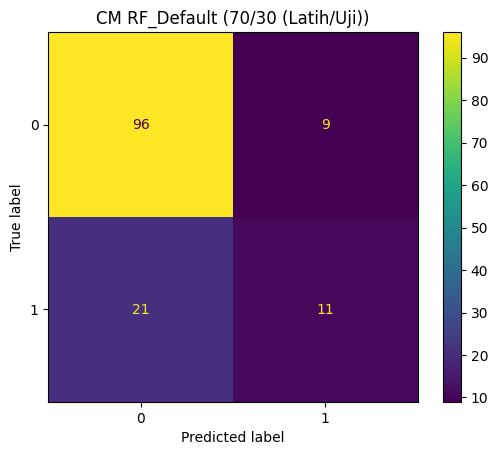

  🏆 Akurasi RF baru terbaik! (0.7810)


In [ ]:
# --- [70/30] Random Forest Default ---
print("\n--- Menjalankan: Random Forest Default (70/30) ---")
model_name = 'RF_Default'
split_name = split_name_70


best_model = RandomForestClassifier(random_state=42)
best_params = {'parameters': 'default'}

start_time = time.time()
best_model.fit(X_train_70, y_train_70)

y_pred_rf_default_70 = best_model.predict(X_test_70)
acc = accuracy_score(y_test_70, y_pred_rf_default_70)
end_time = time.time()

print(f"  Selesai dalam {end_time - start_time:.2f} dtk. Akurasi: {acc:.4f}")

print(classification_report(y_test_70, y_pred_rf_default_70))
cm = confusion_matrix(y_test_70, y_pred_rf_default_70)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot()
plt.title(f"CM {model_name} ({split_name})")
plt.show()

results.append({'split_scenario': split_name, 'model_tuner': model_name, 'accuracy': acc, 'best_params': best_params})
if acc > best_trackers['RF']['accuracy']:
    print(f"  🏆 Akurasi RF baru terbaik! ({acc:.4f})")
    best_trackers['RF'].update({'accuracy': acc, 'model': best_model, 'name': f"{model_name} ({split_name})", 'params': best_params})

## Random Forest GridSearchCV (70/30)


--- Menjalankan: Random Forest GridSearch (70/30) ---
  Selesai dalam 88.11 dtk. Akurasi: 0.8029
  Parameter Terbaik: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       105
           1       0.62      0.41      0.49        32

    accuracy                           0.80       137
   macro avg       0.73      0.67      0.68       137
weighted avg       0.79      0.80      0.79       137



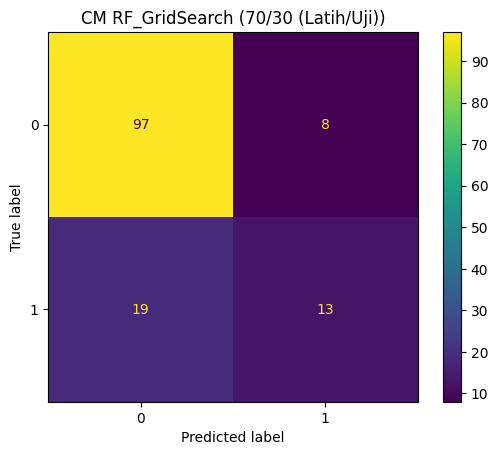

  🏆 Akurasi RF baru terbaik! (0.8029)


In [ ]:
# --- [70/30] Random Forest GridSearch ---
print("\n--- Menjalankan: Random Forest GridSearch (70/30) ---")
model_name = 'RF_GridSearch'
split_name = split_name_70

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, None],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

base_rf = RandomForestClassifier(random_state=42)
tuner = GridSearchCV(base_rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1, verbose=0)

start_time = time.time()
tuner.fit(X_train_70, y_train_70)

best_model = tuner.best_estimator_
best_params = tuner.best_params_
y_pred_rf_grid_70 = best_model.predict(X_test_70)
acc = accuracy_score(y_test_70, y_pred_rf_grid_70)
end_time = time.time()

print(f"  Selesai dalam {end_time - start_time:.2f} dtk. Akurasi: {acc:.4f}")
print(f"  Parameter Terbaik: {best_params}")

print(classification_report(y_test_70, y_pred_rf_grid_70))
cm = confusion_matrix(y_test_70, y_pred_rf_grid_70)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot()
plt.title(f"CM {model_name} ({split_name})")
plt.show()

results.append({'split_scenario': split_name, 'model_tuner': model_name, 'accuracy': acc, 'best_params': best_params})
if acc > best_trackers['RF']['accuracy']:
    print(f"  🏆 Akurasi RF baru terbaik! ({acc:.4f})")
    best_trackers['RF'].update({'accuracy': acc, 'model': best_model, 'name': f"{model_name} ({split_name})", 'params': best_params})

## Random Forest RandomSearchCV (70/30)


--- Menjalankan: Random Forest RandomSearch (70/30) ---
  Selesai dalam 54.41 dtk. Akurasi: 0.8029
  Parameter Terbaik: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 0.5, 'max_depth': 25}
              precision    recall  f1-score   support

           0       0.84      0.91      0.88       105
           1       0.61      0.44      0.51        32

    accuracy                           0.80       137
   macro avg       0.73      0.68      0.69       137
weighted avg       0.79      0.80      0.79       137



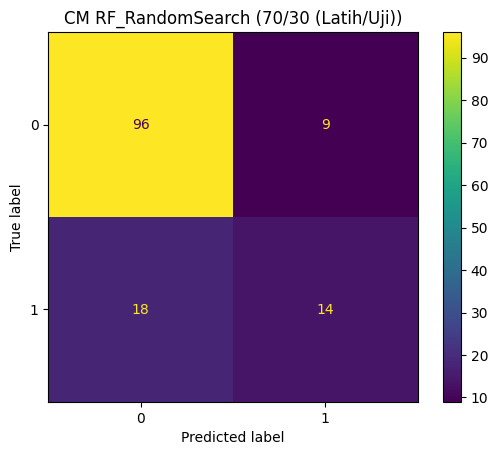

In [ ]:
# --- [70/30] Random Forest RandomSearch ---
print("\n--- Menjalankan: Random Forest RandomSearch (70/30) ---")
model_name = 'RF_RandomSearch'
split_name = split_name_70


param_dist_rf = {
    'n_estimators': [50, 100, 200, 300, 400],
    'max_depth': [5, 10, 15, 20, 25, 30, None],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'min_samples_split': [2, 5, 10, 15],
    'max_features': ['sqrt', 'log2', 0.5, 0.7, 1.0]
}

base_rf = RandomForestClassifier(random_state=42)
tuner = RandomizedSearchCV(base_rf, param_dist_rf, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, verbose=0, random_state=42)

start_time = time.time()
tuner.fit(X_train_70, y_train_70)

best_model = tuner.best_estimator_
best_params = tuner.best_params_
y_pred_rf_random_70 = best_model.predict(X_test_70)
acc = accuracy_score(y_test_70, y_pred_rf_random_70)
end_time = time.time()

print(f"  Selesai dalam {end_time - start_time:.2f} dtk. Akurasi: {acc:.4f}")
print(f"  Parameter Terbaik: {best_params}")

print(classification_report(y_test_70, y_pred_rf_random_70))
cm = confusion_matrix(y_test_70, y_pred_rf_random_70)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot()
plt.title(f"CM {model_name} ({split_name})")
plt.show()

results.append({'split_scenario': split_name, 'model_tuner': model_name, 'accuracy': acc, 'best_params': best_params})
if acc > best_trackers['RF']['accuracy']:
    print(f"  🏆 Akurasi RF baru terbaik! ({acc:.4f})")
    best_trackers['RF'].update({'accuracy': acc, 'model': best_model, 'name': f"{model_name} ({split_name})", 'params': best_params})

# Random Forest Default (80/20)


--- Menjalankan: Random Forest Default (80/20) ---
  Selesai dalam 0.14 dtk. Akurasi: 0.7935
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        70
           1       0.62      0.36      0.46        22

    accuracy                           0.79        92
   macro avg       0.72      0.65      0.66        92
weighted avg       0.77      0.79      0.77        92



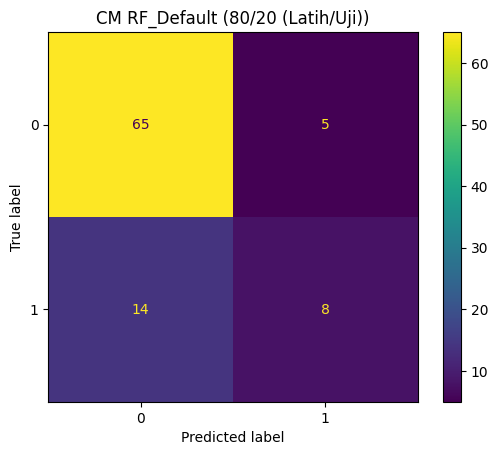

In [ ]:
# --- [80/20] Random Forest Default ---
print("\n--- Menjalankan: Random Forest Default (80/20) ---")
model_name = 'RF_Default'
split_name = split_name_80

best_model = RandomForestClassifier(random_state=42)
best_params = {'parameters': 'default'}

start_time = time.time()
best_model.fit(X_train_80, y_train_80)

y_pred_rf_default_80 = best_model.predict(X_test_80)
acc = accuracy_score(y_test_80, y_pred_rf_default_80)
end_time = time.time()

print(f"  Selesai dalam {end_time - start_time:.2f} dtk. Akurasi: {acc:.4f}")

print(classification_report(y_test_80, y_pred_rf_default_80))
cm = confusion_matrix(y_test_80, y_pred_rf_default_80)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot()
plt.title(f"CM {model_name} ({split_name})")
plt.show()

results.append({'split_scenario': split_name, 'model_tuner': model_name, 'accuracy': acc, 'best_params': best_params})
if acc > best_trackers['RF']['accuracy']:
    print(f"  🏆 Akurasi RF baru terbaik! ({acc:.4f})")
    best_trackers['RF'].update({'accuracy': acc, 'model': best_model, 'name': f"{model_name} ({split_name})", 'params': best_params})

## Random Forest GridSearchCV (80/20)


--- Menjalankan: Random Forest GridSearch (80/20) ---
  Selesai dalam 87.36 dtk. Akurasi: 0.8043
  Parameter Terbaik: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.82      0.94      0.88        70
           1       0.67      0.36      0.47        22

    accuracy                           0.80        92
   macro avg       0.75      0.65      0.68        92
weighted avg       0.79      0.80      0.78        92



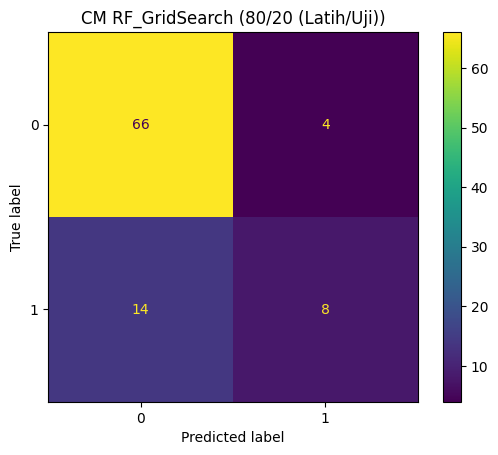

  🏆 Akurasi RF baru terbaik! (0.8043)


In [ ]:
# --- [80/20] Random Forest GridSearch ---
print("\n--- Menjalankan: Random Forest GridSearch (80/20) ---")
model_name = 'RF_GridSearch'
split_name = split_name_80

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, None],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

base_rf = RandomForestClassifier(random_state=42)
tuner = GridSearchCV(base_rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1, verbose=0)

start_time = time.time()
tuner.fit(X_train_80, y_train_80)

best_model = tuner.best_estimator_
best_params = tuner.best_params_
y_pred_rf_grid_80 = best_model.predict(X_test_80)
acc = accuracy_score(y_test_80, y_pred_rf_grid_80)
end_time = time.time()

print(f"  Selesai dalam {end_time - start_time:.2f} dtk. Akurasi: {acc:.4f}")
print(f"  Parameter Terbaik: {best_params}")

print(classification_report(y_test_80, y_pred_rf_grid_80))
cm = confusion_matrix(y_test_80, y_pred_rf_grid_80)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot()
plt.title(f"CM {model_name} ({split_name})")
plt.show()

results.append({'split_scenario': split_name, 'model_tuner': model_name, 'accuracy': acc, 'best_params': best_params})
if acc > best_trackers['RF']['accuracy']:
    print(f"  🏆 Akurasi RF baru terbaik! ({acc:.4f})")
    best_trackers['RF'].update({'accuracy': acc, 'model': best_model, 'name': f"{model_name} ({split_name})", 'params': best_params})

## Random Forest RandomSearchCV (80/20)


--- Menjalankan: Random Forest RandomSearch (80/20) ---
  Selesai dalam 56.10 dtk. Akurasi: 0.8043
  Parameter Terbaik: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10}
              precision    recall  f1-score   support

           0       0.83      0.93      0.88        70
           1       0.64      0.41      0.50        22

    accuracy                           0.80        92
   macro avg       0.74      0.67      0.69        92
weighted avg       0.79      0.80      0.79        92



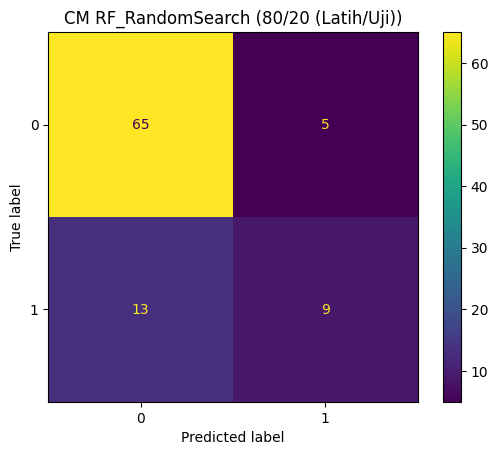

In [ ]:
# --- [80/20] Random Forest RandomSearch ---
print("\n--- Menjalankan: Random Forest RandomSearch (80/20) ---")
model_name = 'RF_RandomSearch'
split_name = split_name_80

param_dist_rf = {
    'n_estimators': [50, 100, 200, 300, 400],
    'max_depth': [5, 10, 15, 20, 25, 30, None],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'min_samples_split': [2, 5, 10, 15],
    'max_features': ['sqrt', 'log2', 0.5, 0.7, 1.0]
}

base_rf = RandomForestClassifier(random_state=42)
tuner = RandomizedSearchCV(base_rf, param_dist_rf, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, verbose=0, random_state=42)

start_time = time.time()
tuner.fit(X_train_80, y_train_80)

best_model = tuner.best_estimator_
best_params = tuner.best_params_
y_pred_rf_random_80 = best_model.predict(X_test_80)
acc = accuracy_score(y_test_80, y_pred_rf_random_80)
end_time = time.time()

print(f"  Selesai dalam {end_time - start_time:.2f} dtk. Akurasi: {acc:.4f}")
print(f"  Parameter Terbaik: {best_params}")

print(classification_report(y_test_80, y_pred_rf_random_80))
cm = confusion_matrix(y_test_80, y_pred_rf_random_80)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot()
plt.title(f"CM {model_name} ({split_name})")
plt.show()

results.append({'split_scenario': split_name, 'model_tuner': model_name, 'accuracy': acc, 'best_params': best_params})
if acc > best_trackers['RF']['accuracy']:
    print(f"  🏆 Akurasi RF baru terbaik! ({acc:.4f})")
    best_trackers['RF'].update({'accuracy': acc, 'model': best_model, 'name': f"{model_name} ({split_name})", 'params': best_params})

# Ringkasan Hasil Akhir

In [ ]:
# --- Hasil Akhir ---

print("\n" + "="*60)
print("RINGKASAN HASIL EKSPERIMEN")
print("="*60)

df_results = pd.DataFrame(results)
df_results_sorted = df_results.sort_values(by='accuracy', ascending=False).reset_index(drop=True)
print(df_results_sorted.to_string())

print("\n--- Model Terbaik Keseluruhan ---")
best_overall_idx = df_results_sorted.index[0]
print(df_results_sorted.iloc[best_overall_idx])


RINGKASAN HASIL EKSPERIMEN
       split_scenario       model_tuner  accuracy                                                                                                          best_params
0   80/20 (Latih/Uji)    XGB_GridSearch  0.826087                                        {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
1   70/30 (Latih/Uji)    XGB_GridSearch  0.824818                                        {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.6}
2   80/20 (Latih/Uji)   RF_RandomSearch  0.804348       {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10}
3   80/20 (Latih/Uji)     RF_GridSearch  0.804348                             {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
4   70/30 (Latih/Uji)   RF_RandomSearch  0.802920          {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_fea

# Save Model and Scaler

In [ ]:
print("\n" + "="*50)
print("MENYIMPAN MODEL TERBAIK")
print("="*50)

# --- Simpan Model XGBoost Terbaik ---
xgb_info = best_trackers['XGB']
print("\n--- Model XGBoost Terbaik ---")
if xgb_info['model']:
    print(f"Nama Eksperimen: {xgb_info['name']}")
    print(f"Akurasi:         {xgb_info['accuracy']:.4f}")
    print(f"Parameter:       {xgb_info['params']}")

    # Simpan Model
    with open("best_xgboost_model.pkl", "wb") as f:
        pickle.dump(xgb_info['model'], f)
    print("\n  > Model telah disimpan ke 'best_xgboost_model.pkl'")

# --- Simpan Model Random Forest Terbaik ---
rf_info = best_trackers['RF']
print("\n--- Model Random Forest Terbaik ---")
if rf_info['model']:
    print(f"Nama Eksperimen: {rf_info['name']}")
    print(f"Akurasi:         {rf_info['accuracy']:.4f}")
    print(f"Parameter:       {rf_info['params']}")

    # Simpan Model
    with open("best_random_forest_model.pkl", "wb") as f:
        pickle.dump(rf_info['model'], f)
    print("\n  > Model telah disimpan ke 'best_random_forest_model.pkl'")

print("\n" + "="*60)
print("Proses Selesai.")


MENYIMPAN MODEL TERBAIK

--- Model XGBoost Terbaik ---
Nama Eksperimen: XGB_GridSearch (80/20 (Latih/Uji))
Akurasi:         0.8261
Parameter:       {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}

  > Model telah disimpan ke 'best_xgboost_model.pkl'

--- Model Random Forest Terbaik ---
Nama Eksperimen: RF_GridSearch (80/20 (Latih/Uji))
Akurasi:         0.8043
Parameter:       {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}

  > Model telah disimpan ke 'best_random_forest_model.pkl'

Proses Selesai.


Pengujian Hipotesis

In [ ]:
import numpy as np
from statsmodels.stats.contingency_tables import mcnemar

def run_mcnemar_test(y_true, y_pred_A, y_pred_B, name_A, name_B):

    print("=" * 50)
    print(f"Menguji: {name_A} vs. {name_B}")
    print("-" * 50)

    # 1. Hitung tabel kontingensi (a, b, c, d)
    a, b, c, d = 0, 0, 0, 0

    # Pastikan y_true adalah numpy array untuk perbandingan
    y_true_array = np.array(y_true)

    for i in range(len(y_true_array)):
        y_t = y_true_array[i]
        pred_A = y_pred_A[i]
        pred_B = y_pred_B[i]

        if pred_A == y_t and pred_B == y_t:
            a += 1  # Keduanya Benar
        elif pred_A == y_t and pred_B != y_t:
            b += 1  # A Benar, B Salah
        elif pred_A != y_t and pred_B == y_t:
            c += 1  # A Salah, B Benar
        elif pred_A != y_t and pred_B != y_t:
            d += 1  # Keduanya Salah

    # 2. Buat tabel 2x2
    tabel_kontingensi = np.array([[a, b], [c, d]])

    print("Tabel Kontingensi 2x2:")
    print(f"                 {name_B} (Benar) | {name_B} (Salah)")
    print(f"{name_A} (Benar) |      {a:^6}      |      {b:^6}   ")
    print(f"{name_A} (Salah)|      {c:^6}      |      {d:^6}   ")
    print("-" * 50)
    print(f"b (Kasus {name_A} unggul): {b}")
    print(f"c (Kasus {name_B} unggul): {c}")
    print("-" * 50)

    # 3. Hitung McNemar's Test
    if b + c == 0:
        print("HASIL: Kedua model membuat kesalahan yang persis sama (b+c=0).")
        print("P-value dianggap 1.0 (Tidak ada perbedaan signifikan).")
        p_value = 1.0
    else:
        result = mcnemar(tabel_kontingensi, exact=False, correction=True)
        p_value = result.pvalue
        print(f"Nilai Chi-Square (statistic): {result.statistic:.4f}")
        print(f"Nilai P-value: {p_value:.4f}")
        print("-" * 50)

    # 4. Interpretasi Hasil
    alpha = 0.05
    if p_value <= alpha:
        print("KESIMPULAN (H0 DITOLAK):")
        print("Terdapat perbedaan yang signifikan secara statistik antara kedua model.")
    else:
        print("KESIMPULAN (H0 DITERIMA):")
        print("Tidak terdapat perbedaan yang signifikan secara statistik antara kedua model.")

    print("=" * 50 + "\n")


print("=== MEMULAI PENGUJIAN HIPOTESIS (SKENARIO 70/30) ===")
if y_test_70 is not None:
    # 1. Default (70/30)
    if y_pred_xgb_default_70 is not None and y_pred_rf_default_70 is not None:
        run_mcnemar_test(y_test_70, y_pred_xgb_default_70, y_pred_rf_default_70,
                         "XGB_Default (70/30)", "RF_Default (70/30)")

    # 2. GridSearch (70/30)
    if y_pred_xgb_grid_70 is not None and y_pred_rf_grid_70 is not None:
        run_mcnemar_test(y_test_70, y_pred_xgb_grid_70, y_pred_rf_grid_70,
                         "XGB_GridSearch (70/30)", "RF_GridSearch (70/30)")

    # 3. RandomSearch (70/30)
    if y_pred_xgb_random_70 is not None and y_pred_rf_random_70 is not None:
        run_mcnemar_test(y_test_70, y_pred_xgb_random_70, y_pred_rf_random_70,
                         "XGB_RandomSearch (70/30)", "RF_RandomSearch (70/30)")
else:
    print("Variabel 70/30 (y_true_70_30) belum diisi.\n")


print("\n=== MEMULAI PENGUJIAN HIPOTESIS (SKENARIO 80/20) ===")
if y_test_80 is not None:
    # 4. Default (80/20)
    if y_pred_xgb_default_80 is not None and y_pred_rf_default_80 is not None:
        run_mcnemar_test(y_test_80, y_pred_xgb_default_80, y_pred_rf_default_80,
                         "XGB_Default (80/20)", "RF_Default (80/20)")

    # 5. GridSearch (80/20)
    if y_pred_xgb_grid_80 is not None and y_pred_rf_grid_80 is not None:
        run_mcnemar_test(y_test_80, y_pred_xgb_grid_80, y_pred_rf_grid_80,
                         "XGB_GridSearch (80/20)", "RF_GridSearch (80/20)")

    # 6. RandomSearch (80/20)
    if y_pred_xgb_random_80 is not None and y_pred_rf_random_80 is not None:
        run_mcnemar_test(y_test_80, y_pred_xgb_random_80, y_pred_rf_random_80,
                         "XGB_RandomSearch (80/20)", "RF_RandomSearch (80/20)")
else:
    print("Variabel 80/20 (y_true_80_20) belum diisi. Harap jalankan eksperimen 80/20 dan isi variabelnya.")

=== MEMULAI PENGUJIAN HIPOTESIS (SKENARIO 70/30) ===
Menguji: XGB_Default (70/30) vs. RF_Default (70/30)
--------------------------------------------------
Tabel Kontingensi 2x2:
                 RF_Default (70/30) (Benar) | RF_Default (70/30) (Salah)
XGB_Default (70/30) (Benar) |       100        |        6      
XGB_Default (70/30) (Salah)|        7         |        24     
--------------------------------------------------
b (Kasus XGB_Default (70/30) unggul): 6
c (Kasus RF_Default (70/30) unggul): 7
--------------------------------------------------
Nilai Chi-Square (statistic): 0.0000
Nilai P-value: 1.0000
--------------------------------------------------
KESIMPULAN (H0 DITERIMA):
Tidak terdapat perbedaan yang signifikan secara statistik antara kedua model.

Menguji: XGB_GridSearch (70/30) vs. RF_GridSearch (70/30)
--------------------------------------------------
Tabel Kontingensi 2x2:
                 RF_GridSearch (70/30) (Benar) | RF_GridSearch (70/30) (Salah)
XGB_GridSearch